In [1]:
import pandas as pd


In [17]:
aqi = [50, 35, 65, 70]
city = ['BJ', 'SH', 'GZ', 'SZ']

my_data = pd.Series(aqi, index=city)

my_data.index
my_data.values

my_data.loc[ ['BJ', 'SZ']  ]
my_data.iloc[0]


my_data**2

BJ    2500
SH    1225
GZ    4225
SZ    4900
dtype: int64

In [34]:
# Read in csv

met = pd.read_csv('Met_2020.csv')
#met.info()
#met.columns
#met.head(10)
#met.tail(100)

met.describe()

#met[['P','T']]

#met.iloc[10:20,1:3]

,WS,WD,T,RH,P,Precip
count,8768.000000,8768.000000,8768.000000,8768.000000,8768.000000,8768.000000
mean,2.516298,161.961109,22.288378,84.108919,550.572776,0.192781
std,24.021541,106.688013,19.544207,24.397022,829.587544,1.562305
min,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,0.000000
25%,1.500000,79.000000,18.600000,77.000000,986.600000,0.000000
50%,2.400000,124.000000,23.300000,87.000000,991.600000,0.000000
75%,4.100000,257.000000,26.900000,96.000000,997.400000,0.000000
max,15.200000,360.000000,35.500000,100.000000,1010.600000,42.800000


In [63]:
met['P'][met['P'] == -999.0]

met['T'][(met['P'] == -999.0) & (met['T'] == -999.0)]


met['T'][(met['T'] > 20) & (met['T'] < 25)]


met2 = met[ (met['Time'].str.contains('12:00'))  | (met['WD'] >3) ]
met.sort_values(['T', 'P'], ascending=[0,1])




,Time,Site,WS,WD,T,RH,P,Precip
5077,2020/7/30 13:00,G3674,3.5,85,35.5,52,989.7,0.0
5893,2020/9/2 13:00,G3674,2.4,113,34.0,67,989.0,0.0
5076,2020/7/30 12:00,G3674,5.8,76,33.7,54,990.3,0.0
5868,2020/9/1 12:00,G3674,1.6,99,33.5,72,988.8,0.0
5891,2020/9/2 11:00,G3674,1.3,98,33.5,71,990.0,0.0
...,...,...,...,...,...,...,...,...
8748,2020/12/31 4:00,G3674,11.4,337,6.1,38,-999.0,0.0
8752,2020/12/31 8:00,G3674,5.2,350,5.9,29,-999.0,0.0
6838,2020/10/11 22:00,G3674,-999.0,-999,-999.0,-999,-999.0,0.0
6839,2020/10/11 23:00,G3674,-999.0,-999,-999.0,-999,-999.0,0.0


In [67]:
met['F'] = met['T']*9/5 + 32
met['ND'] = met['P']*100*6.02e23/8.314/met['T']*1e-6
met

met.drop(columns=['F','ND'])

,Time,Site,WS,WD,T,RH,P,Precip
0,2020/1/1 0:00,G3674,3.1,91,15.9,92,1008.1,0.0
1,2020/1/1 1:00,G3674,2.9,108,15.7,91,1008.1,0.0
2,2020/1/1 2:00,G3674,2.8,106,15.5,92,1007.8,0.0
3,2020/1/1 3:00,G3674,3.9,98,15.3,92,1007.5,0.0
4,2020/1/1 4:00,G3674,4.6,79,15.2,91,1007.4,0.0
...,...,...,...,...,...,...,...,...
8763,2020/12/31 19:00,G3674,2.5,340,9.4,30,-999.0,0.0
8764,2020/12/31 20:00,G3674,2.4,338,9.7,30,-999.0,0.0
8765,2020/12/31 21:00,G3674,2.7,349,9.8,33,-999.0,0.0
8766,2020/12/31 22:00,G3674,5.4,348,9.8,35,-999.0,0.0


In [83]:
met2 = met[ (met['Time'].str.contains('12:00'))  & (met['WD'] >3) ]
met2

met2.reset_index(drop=True, inplace=True)
met2

met2.to_excel('Met_new2.xlsx', index=False)

<AxesSubplot:xlabel='Hour'>

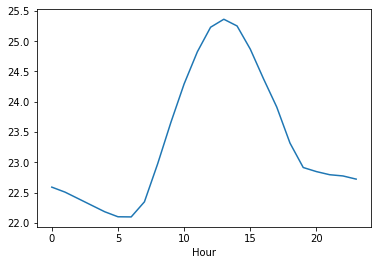

In [99]:
# Group by
# Make a new column
met = pd.read_csv('Met_2020.csv')
met['WD_new'] = 'N'

# Assign wind dirctions
met.loc[ (met['WD'] <=135 ) & (met['WD'] > 45 ), ['WD_new'] ] = 'E'
met.loc[ (met['WD'] <=225 ) & (met['WD'] > 135 ), ['WD_new'] ] = 'S'
met.loc[ (met['WD'] <=315 ) & (met['WD'] > 225 ), ['WD_new'] ] = 'W'

# Remove missing data
met = met.loc[ (met['WS']!=-999) & (met['WD']!=-999) & 
               (met['T']!=-999) & (met['RH']!=-999) & 
              (met['P']!=-999) & (met['Precip']!=-999) ]

#met.groupby('WD_new').mean()['T'].plot(kind='bar')

met['Hour'] = pd.to_datetime(met['Time']).dt.hour

met.groupby('Hour').mean()['T'].plot()



## Exercise #4

Month
5    66.458333
6    78.222222
7    83.884615
8    83.695652
9    76.896552
Name: Temperature, dtype: float64

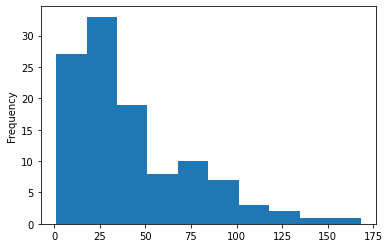

In [125]:
# 1 read csv file
ozone_data = pd.read_csv('ozone_data.csv')

# check head
ozone_data.head()

# Get the lowest temperature.
ozone_data['Temperature'].min()

# Count the total number of days 
# with ozone higher than 40.
len(ozone_data['Ozone'][ozone_data['Ozone']>=40])

# Get the date that has the highest ozone
# Longfeng Niu ?
ozone_data[ozone_data['Ozone']==
                    ozone_data['Ozone'].max()]

# Plot a histogram of ozone
ozone_data['Ozone'].plot(kind='hist')

# Get the mean pressure in May.
# Runqiu Zhou
ozone_data['Pressure'][ozone_data['Month']==5].mean()

# Get the mean pressure when the temperature 
# is lower than 40 and wind speed is higher than 4.0.
ozone_data['Pressure'][ (ozone_data['Temperature']>40) &
                      (ozone_data['Wind.Speed']>2.0) ].mean()

# Group the data by month, 
# plot a bar plot to show mean ozone in different months.
ozone_data.groupby(['Month']).mean()['Temperature']
